# Evaluación de Pandas Mónica Serrano

1. Importad Pandas

In [46]:
# También añadimos otras librerias que necesitaremos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re

## Exploración

2. Exploración del conjunto de datos:
* Cargad el fichero, al cargarlo os aparecerá una columna llamada "Unnamed: 0". Cargad el dataset sin que aparezca esta columna.

In [47]:
# Utilizamos index_col para quitar esa columna.
df = pd.read_csv('files/spotify_youtube.csv',index_col=0)
df.sample()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
18302,Murilo Huff,https://open.spotify.com/artist/3hq7WoPJsrRP0K...,Ponto Final - Ao Vivo,Ponto Final (Ao Vivo),single,spotify:track:49eptxEc4U8US6I3RuoeXp,"0,548","0,638","9,0","-4,193","0,0519","0,677","0,0",0.917,0.447,96.87,147827.0,https://www.youtube.com/watch?v=o6S3zsQUO_U,Luiza Martins e Murilo Huff - Ponto Final (Cli...,Luiza Martins 🎤,4969106.0,47137.0,12569.0,Contato para Shows: (11) 97054-2591 (11) 96526...,True,True,1993976.0


* Cuando leais el fichero, veremos que no podemos ver todas las columnas, utilizad el comando correcto para poder visualizarlas todas cuando hacemos un head

In [48]:
pd.options.display.max_columns=None

In [49]:
df.sample()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
5679,Celia Cruz,https://open.spotify.com/artist/2weA6hhVqTIN2g...,"Quizás, Quizás, Quizás",Boleros,album,spotify:track:7FES7rrRiopj1YLqIUyyGO,"0,632","0,33","9,0","-10,939","0,0328","0,876","8,19e-06",0.106,0.805,109.826,150507.0,https://www.youtube.com/watch?v=B07BfLDsB0Q,Celia Cruz - Quizas Quizas Quizas,Yayla Kelek,342026.0,3157.0,59.0,Bir bahçenin ortası gibi,False,False,10135866.0


* Primeras 5 filas del dataframe

In [50]:
# Utilizamos el método head sin número porque por defecto muestra las cinco primeras filas.
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,"0,695","0,923","1,0","-3,93","0,0522","0,0425","0,0469",0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,"0,689","0,739","2,0","-5,81","0,026","1,51e-05","0,509",0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,"0,663","0,694","10,0","-8,627","0,171","0,0253","0,0",0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


* Últimas 5 filas del dataframe

In [51]:
# Utilizamos el método tail sin número porque por defecto muestra las cinco últimas filas.
df.tail()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,"0,582","0,926","5,0","-6,344","0,0328","0,448","0,0",0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,"0,531","0,936","4,0","-1,786","0,137","0,028","0,0",0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,"0,443","0,83","4,0","-4,679","0,0647","0,0243","0,0",0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,"0,417","0,767","9,0","-4,004","0,419","0,356","0,0184",0.1080,0.5390,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,"0,498","0,938","6,0","-4,543","0,107","0,00277","0,911",0.1360,0.0787,160.067,181500.0,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


* 10 filas aleatorias del dataframe

In [52]:
# En este caso sí que tenemos que especificar el número ya que por defecto sólo nos muestra 1 fila.
df.sample(10)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
18985,Young Cister,https://open.spotify.com/artist/0Yg29FX1M4ayqj...,SEXTIME,SEXTIME,single,spotify:track:2kEuOngY5Td8iGxnzl8vPr,"0,696","0,799","2,0","-4,887","0,171","0,162","0,000133",0.0697,0.587,196.063,197792.0,https://www.youtube.com/watch?v=3PDNTwOhKwo,"Polimá Westcoast, Young Cister, Cris Mj – SEXT...",Polimá Westcoast,16052811.0,139442.0,2572.0,SUSCRÍBETE AQUÍ https://lnk.to/PolimaWestcoas...,False,True,44599538.0
15223,Jay Park,https://open.spotify.com/artist/4XDi67ZENZcbfK...,Need To Know,Need To Know,single,spotify:track:0CqZryIJnJhwCCnECIC7Lr,"0,692","0,703","0,0","-6,271","0,055","0,0209","3,77e-05",0.1030,0.549,87.985,169252.0,https://www.youtube.com/watch?v=8aEYeEKg9zM,박재범 (Jay Park) - ‘Need To Know’ Official Music...,JAY PARK,6126928.0,226980.0,9039.0,박재범 (Jay Park) - ‘Need To Know’ Official Video...,False,False,7028821.0
10891,Shinedown,https://open.spotify.com/artist/70BYFdaZbEKbea...,Second Chance,The Sound of Madness,album,spotify:track:0CwYG1UnRmOx8Q1EzElCIL,"0,46","0,796","0,0","-4,501","0,0333","0,00107","0,0",0.1060,0.182,100.011,222067.0,https://www.youtube.com/watch?v=WbsDPbr8qoM,Shinedown - Second Chance (Official Video) [HD],Shinedown,39195816.0,260178.0,6072.0,The official video remastered in HD for Shined...,True,True,191592986.0
5517,Iggy Pop,https://open.spotify.com/artist/33EUXrFKGjpUSG...,Strung Out Johnny,EVERY LOSER,album,spotify:track:6OGIBcJV5qV1FF5uiofnX0,"0,521","0,884","10,0","-5,354","0,0387","0,000156","0,0191",0.0837,0.465,124.051,253893.0,https://www.youtube.com/watch?v=gmNhs5pWxH8,Iggy Pop - Strung Out Johnny (Official Video),Iggy Pop Official,345403.0,13405.0,828.0,Iggy Pop - 'Every Loser' Out Now: https://Atla...,False,False,1641537.0
10187,Jeremy Soule,https://open.spotify.com/artist/77yY2QmM6bYvjJ...,Dragonborn,The Elder Scrolls V: Skyrim: Original Game Sou...,album,spotify:track:2gaZJDgE71VL9PzzUUlpMg,"0,413","0,482","11,0","-13,311","0,0539","0,895","0,685",0.1110,0.130,66.766,235636.0,https://www.youtube.com/watch?v=6fILxnBH1Tg,Dragonborn,Jeremy Soule - Topic,7841194.0,106983.0,1127.0,Provided to YouTube by TuneCore\n\nDragonborn ...,True,True,37128350.0
10135,Los Caminantes,https://open.spotify.com/artist/6ziEnj8UydSg8d...,Entrega Total,Tesoros De Coleccion: Lo Romantico De...,album,spotify:track:7stMv1LKvaYLQnRrWK2GOw,"0,549","0,669","10,0","-5,39","0,0386","0,0366","2,5e-06",0.1020,0.681,175.892,163427.0,https://www.youtube.com/watch?v=9RPB-LDetHA,Entrega Total los Caminantes,Abraham O.,697938.0,3612.0,136.0,Los Caminantes es un grupo musical mexicano or...,False,False,12130632.0
17090,Rochak Kohli,https://open.spotify.com/artist/3dN9MQpjIyNxye...,Tera Yaar Hoon Main,Sonu Ke Titu Ki Sweety,compilation,spotify:track:4ZTx87kAgEwlPMzoojFZWg,"0,559","0,541","10,0","-5,525","0,0313","0,34","4,66e-06",0.1020,0.309,83.978,264806.0,https://www.youtube.com/watch?v=EatzcaVJRMs,Full Video: Tera Yaar Hoon Main | Sonu Ke Titu...,T-Series,306531461.0,2522128.0,57707.0,Presenting the FRIENDSHIP ANTHEM full video so...,True,True,85901507.0
5613,Joe Cocker,https://open.spotify.com/artist/3pFCERyEiP5xeN...,You Are So Beautiful,I Can Stand A Little Rain,album,spotify:track:1gJOqXpRjz9GeEEwQpcujK,"0,297","0,182","1,0","-10,944","0,0298","0,846","0,00267",0.1340,0.092,83.391,159640.0,https://www.youtube.com/watch?v=wlDmslyGmGI,Joe Cocker - You are so beautiful (nearly unpl...,lomey,36594933.0,144874.0,7290.0,from a German TV concert (Ohne Filter) in the ...,False,False,162383972.0
1843,Diddy,https://open.spotify.com/artist/59wfkuBoNyhDMQ...,Last Night,Just Like You,album,spotify:track:3Cn1FSSTXeQ7hCfrbizrD0,"0,916","0,849","3,0","-5,034","0,0639","0,166","0,000193",0.0859,0.974,121.002,255773.0,https://www.youtube.com/watch?v=AxFhwtwiw6o,Diddy [fea

* ¿Cuántas filas y columnas tenemos en el dataframe?

In [53]:
df.shape
# El primer número corresponde al nº de filas y el segundo al de columnas.

(20718, 27)

In [54]:
num_filas, num_columnas = df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 20718
Número de columnas: 27


* ¿Cuáles son los tipos de los datos de cada columna del dataframe?

In [55]:
df.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability         object
Energy               object
Key                  object
Loudness             object
Speechiness          object
Acousticness         object
Instrumentalness     object
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
Official_video       object
Stream              float64
dtype: object

Como vemos casi todas las columnas son de tipo string, excepto algunos floats. No hay ningun interger.

* ¿Cuántos valores nulos tenemos por columna?

In [56]:
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
Official_video      470
Stream              576
dtype: int64

Como vemos son las últimas columnas las que tienen más nulos, mientras que las otras tienen muy pocas. Estos dos últimos apartados se podría hacer con un único método, que es:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  object 
 7   Energy            20716 non-null  object 
 8   Key               20716 non-null  object 
 9   Loudness          20716 non-null  object 
 10  Speechiness       20716 non-null  object 
 11  Acousticness      20716 non-null  object 
 12  Instrumentalness  20716 non-null  object 
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float64
 17

Que como vemos nos muestra la cantidad de datos no nulos de cada columna (sabiendo el total de filas que hay podríamos indentificar los nulos) y por otro lado nos muestra el tipo de dato correspondiente a cada columna.

* ¿Tenemos filas duplicadas en el dataframe?

In [58]:
df.duplicated().sum()

0

El dataframe no tiene ningún duplicado.

* Muestra los principales estadísticos para las columnas numéricas del dataframe

In [59]:
# Si aplicamos el método describe sin especificar nada, coge solo las variables numéricas.
# Utilizamos .T para que transponga la tabla y sea más legible.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liveness,20716.0,1.935210e-01,1.685309e-01,0.0145,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.0000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01
Tempo,20716.0,1.206383e+02,2.957902e+01,0.0000,9.700200e+01,1.199650e+02,1.399350e+02,2.433720e+02
Duration_ms,20716.0,2.247176e+05,1.247905e+05,30985.0000,1.800095e+05,2.132845e+05,2.524430e+05,4.676058e+06
Views,20248.0,9.393782e+07,2.746443e+08,0.0000,1.826002e+06,1.450110e+07,7.039975e+07,8.079649e+09
Likes,20177.0,6.633411e+05,1.789324e+06,0.0000,2.158100e+04,1.244810e+05,5.221480e+05,5.078865e+07
Comments,20149.0,2.751899e+04,1.932347e+05,0.0000,5.090000e+02,3.277000e+03,1.436000e+04,1.608314e+07
Stream,20142.0,1.359422e+08,2.441321e+08,6574.0000,1.767486e+07,4.968298e+07,1.383581e+08,3.386520e+09


Este método nos cuenta los valores que hay en cada columna, la media, la desviación estándar, el mínimo, el máximo y los cuartiles.

* Muestra los principales estadísticos para las columnas categóricas del dataframe

In [60]:
df.describe(include='object').T

,count,unique,top,freq
Artist,20718,2079,Gorillaz,10
Url_spotify,20718,2079,https://open.spotify.com/artist/3AA28KZvwAUcZu...,10
Track,20718,17841,El Ultimo Adiós - Varios Artistas Version,24
Album,20718,11937,Greatest Hits,30
Album_type,20718,3,album,14926
Uri,20718,18862,spotify:track:0tzixmHNQfE6S6SirSToxW,24
Danceability,20716,898,"0,687",78
Energy,20716,1268,"0,572",60
Key,20716,12,"0,0",2305
Loudness,20716,9417,"-7,818",25


En este caso nos muestra, el número de valores no nulos de la columna, el número de valores únicos, el valor más frecuente en la columna y la frecuencia del valor más frecuente.

También está la opción de utilizar un include all donde incluye tanto las numéricas como las categóricas, como vemos a continuación:

In [61]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Artist,20718,2079,Gorillaz,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Url_spotify,20718,2079,https://open.spotify.com/artist/3AA28KZvwAUcZu...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Track,20718,17841,El Ultimo Adiós - Varios Artistas Version,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album,20718,11937,Greatest Hits,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album_type,20718,3,album,14926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uri,20718,18862,spotify:track:0tzixmHNQfE6S6SirSToxW,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danceability,20716,898,"0,687",78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy,20716,1268,"0,572",60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Key,20716,12,"0,0",2305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loudness,20716,9417,"-7,818",25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preparación

3. Preparación de los datos:
* Los nombres de las columnas empiezan con mayúsculas, poned todos los nombres de las columnas en minúsculas.

In [62]:
# Se ha observado el nombre de las columnas y no hay ningún espacio y está todo unido por barra baja por lo que solo hay que hacer un lower.
def cambio_columnas(dataframe):
    """
   Esta función cambiar el nombre de las columnas a minúscula.
  Args: 
       dataframe(dataframe): el dataframe el cual vamos a cambiar sus columnas 
   Returns: aunque no tiene return, esta función modifica el mismo dataframe con todas las columnas en minúsculas.
   """
    columnas_nuevas = {col :  col.lower() for col in dataframe.columns}
    dataframe.rename(columns = columnas_nuevas, inplace = True)

In [63]:
cambio_columnas(df)
df.sample()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
19779,Lofi Fruits Music,https://open.spotify.com/artist/1dABGukgZ8XKKO...,I'm Yours,Lofi Fruits Music 2021,album,spotify:track:1zrP8IY1FZEqFJpYLCGOls,"0,596","0,155","11,0","-15,137","0,0688","0,827","0,898",0.122,0.277,80.341,119750.0,https://www.youtube.com/watch?v=MlK1mbeeCcE,I'm Yours [Lofi Fruits Release],Lofi Fruits,2537149.0,78114.0,2145.0,I'm Yours [Lofi Fruits Release]\n🎮 𝐏𝐥𝐚𝐲 𝐍𝐨𝐰: h...,True,True,51491441.0


* Haciendo el análisis exploratorio nos deberíamos haber dado cuenta de que algunas de las variables (danceability, energy, key, loudness, speechiness, acousticness, instrumentalness) no son del tipo que deberían. Esto es debido a que los decimales están establecidos como comas y no con puntos. Cread una función que nos permita cambiar esas comas por puntos para que los datos tengan el tipo correcto.

In [64]:
def comas_puntos(dataframe, columnas):
    """
   Esta función cambiar las comas por los puntos de cada elemento de varias columnas y lo pasa a tipo float.
  Args: 
       dataframe(dataframe): el dataframe de donde cogeremos las columnas que queremos cambiar.
       columnas(lista): las columnas cuyos elementos queremos cambiar
   Returns: esta función devuelve un dataframe con las columnas cambiadas.
   """
    for columna in columnas: 
        dataframe[columna] = dataframe[columna].str.replace(',', '.').astype(float)# Para que sea de tipo float (modificado posteriormente)

In [65]:
columnas = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']

In [66]:
comas_puntos(df,columnas)
df.sample()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
3120,John Denver,https://open.spotify.com/artist/7EK1bQADBoqbYX...,We Wish You A Merry Christmas,A Christmas Together,album,spotify:track:0Xrev0e2wVRSkq84SJiEMg,0.677,0.353,9.0,-15.636,0.0716,0.814,0.0,0.0904,0.777,84.535,65347.0,https://www.youtube.com/watch?v=J2dmWwEoZIQ,John Denver & The Muppets- We Wish You a Merry...,cornbreadobrien,421667.0,1472.0,62.0,Track 13 from the album by John Denver & The M...,False,False,51130997.0


A continuación se muestran dos formas más de hacer este ejercicio, las cuales no se ejectuan para que no salgan nulos.

In [67]:
'''def cambiar_a_decimal(elemento):
    """
   Esta función cambiar las comas por los puntos de cada elemento y lo pasa a tipo float.
  Args: 
       elemento(string): el elemento que cambiaremos.
   Returns: esta función devuelve un elemento tipo float.
   """
    try:
        return float(elemento.replace(',','.'))
    except:
        return np.nan

for col in columnas:
    df[col] = df[col].apply(cambiar_a_decimal)'''

'def cambiar_a_decimal(elemento):\n    """\n   Esta función cambiar las comas por los puntos de cada elemento y lo pasa a tipo float.\n  Args: \n       elemento(string): el elemento que cambiaremos.\n   Returns: esta función devuelve un elemento tipo float.\n   """\n    try:\n        return float(elemento.replace(\',\',\'.\'))\n    except:\n        return np.nan\n\nfor col in columnas:\n    df[col] = df[col].apply(cambiar_a_decimal)'

In [68]:
'''def cambiar_a_decimal_regex(elemento):
    """
   Esta función cambiar las comas por los puntos de cada elemento y lo pasa a tipo float.
  Args: 
       elemento(string): el elemento que cambiaremos.
   Returns: esta función devuelve un elemento tipo float.
   """
    try:
        return float(re.sub('\,','.',elemento))
    except:
        return np.nan

for col in columnas:
    df[col] = df[col].apply(cambiar_a_decimal_regex)'''

'def cambiar_a_decimal_regex(elemento):\n    """\n   Esta función cambiar las comas por los puntos de cada elemento y lo pasa a tipo float.\n  Args: \n       elemento(string): el elemento que cambiaremos.\n   Returns: esta función devuelve un elemento tipo float.\n   """\n    try:\n        return float(re.sub(\'\\,\',\'.\',elemento))\n    except:\n        return np.nan\n\nfor col in columnas:\n    df[col] = df[col].apply(cambiar_a_decimal_regex)'

* Después de haber hecho los cambios, chequead los tipos de datos. ¿Son ya del tipo correcto? En caso de que no, cread otra función o modificar la anterior para que sean de tipo float

Ninguno se ha modificado, cambiamos la funcion anterior para que salga directamente de tipo float. Lo hacemos de nuevo.

In [69]:
df.dtypes

artist               object
url_spotify          object
track                object
album                object
album_type           object
uri                  object
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
url_youtube          object
title                object
channel              object
views               float64
likes               float64
comments            float64
description          object
licensed             object
official_video       object
stream              float64
dtype: object

Ahora se ha cambiado el tipo de dato de todas las columnas a las que se le aplicado las funciones.

* Hay algunas canciones cuyo título está en mayúsulas. Crea una función para que todos los títulos estén en minúscula. Haced lo mismo para las columnas de "title" y "album"

In [70]:
def minus(elemento):
    """
   Esta función cambia todo el string a minúscula.
  Args: 
       elemento(string): el string que vamos a pasar a minúscula.
   Returns: esta función devuelve un string todo en minúscula.
   """
    return elemento.str.lower()

In [71]:
columnas_2 = ['title','album']

In [72]:
df[columnas_2] = df[columnas_2].apply(minus)

In [73]:
df.sample()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
878,Usher,https://open.spotify.com/artist/23zg3TcAtWQy7J...,Yeah! (feat. Lil Jon & Ludacris),confessions (expanded edition),album,spotify:track:5rb9QrpfcKFHM1EUbSIurX,0.894,0.791,2.0,-4.699,0.112,0.0183,0.0,0.0388,0.583,105.018,250373.0,https://www.youtube.com/watch?v=GxBSyx85Kp8,"usher - yeah! (official video) ft. lil jon, lu...",UsherVEVO,766892796.0,5030572.0,101986.0,"Official HD Video for ""Yeah!"" by Usher feat. L...",True,True,942052772.0


* Algunos de los artistas tienen símbolos raros, en concreto el símbolo $. Cread una función que nos elimine este símbolo de los nombres de los artistas.

In [74]:
# Comprobamos que artista stienen este símbolo.
df[df['artist'].str.contains('\$')]['artist'].value_counts()

artist
Too $hort        10
Curren$y         10
Ty Dolla $ign    10
A$AP Rocky       10
A$AP Ferg        10
Joey Bada$$      10
$uicideboy$      10
bbno$            10
$NOT             10
Name: count, dtype: int64

In [75]:
def simbolos(elemento):
    """
   Esta función cambia las $ por S.
  Args: 
       elemento(string): el string que contiene este caracter.
   Returns: esta función devuelve un string sustituido.
   """
    return elemento.replace('$','S')


In [76]:
df['artist'] = df['artist'].apply(simbolos)

In [77]:
df[df['artist'].str.contains('\$')]['artist'].value_counts()

Series([], Name: count, dtype: int64)

In [78]:
# El anterior caso nos ha servido porque no tenemos nulos, si tuvieramos tendríamos este código.
def simbolos(elemento):
    """
   Esta función cambia las $ por S.
  Args: 
       elemento(string): el string que contiene este caracter.
   Returns: esta función devuelve un string sustituido.
    """
    try:
        return elemento.replace('$','S')
    except:
        return np.nan

In [79]:
# Otra forma
'''def simbolos(dataframe,columna):
    """
   Esta función cambia las $ por S.
  Args: 
       dataframe(dataframe): el dataframe en el cual tenemos la columna que queremos modificar.
       columna(columna)
   Returns: esta función devuelve la misma columna sustituida.
    """
   dataframe[columna] = dataframe[columna].replace('$','S')'''

'def simbolos(dataframe,columna):\n    """\n   Esta función cambia las $ por S.\n  Args: \n       dataframe(dataframe): el dataframe en el cual tenemos la columna que queremos modificar.\n       columna(columna)\n   Returns: esta función devuelve la misma columna sustituida.\n    """\n   dataframe[columna] = dataframe[columna].replace(\'$\',\'S\')'

## Filtrado y visualización

4. Filtrado de datos y Visualización:

* ¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?

In [80]:
# Valores únicos
tipo_album = df['album_type'].value_counts()
tipo_album

album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64

In [81]:
album = df[df['album_type'] == 'album']
print(f'Las canciones en el  tipo album son', album['track'].count())

Las canciones en el  tipo album son 14926


In [82]:
single = df[df['album_type'] == 'single']
print(f'Las canciones en el tipo single son',single['track'].count())

Las canciones en el tipo single son 5004


In [83]:
comp = df[df['album_type'] == 'compilation']
print(f'Las canciones en el tipo compilacion son', comp['track'].count())

Las canciones en el tipo compilacion son 788


* Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [84]:
dance = album.groupby('artist')['danceability'].agg(['mean','std']).reset_index().sort_values(by='mean',ascending=False)
acoustic = album.groupby('artist')['acousticness'].agg(['mean','std']).reset_index().sort_values(by='mean',ascending=False)
speech = album.groupby('artist')['speechiness'].agg(['mean','std']).reset_index().sort_values(by='mean',ascending=False)

In [85]:
dance.head()

,artist,mean,std
1003,Latto,0.922333,0.014503
1261,Murda,0.911500,0.030406
848,Jon Z,0.886000,0.015556
204,Blueface,0.885000,0.043782
887,Jung Kook,0.881000,NaN


In [86]:
acoustic.head()

,artist,mean,std
351,Claude Debussy,0.993714,0.001380
1509,Robert Schumann,0.993444,0.004902
601,Franz Schubert,0.989500,0.005237
506,Edvard Grieg,0.989500,0.007863
607,Frédéric Chopin,0.989286,0.004071


In [87]:
speech.head()

,artist,mean,std
1627,Sir Arthur Conan Doyle,0.9523,0.008845
181,Bibi Blocksberg,0.9453,0.011879
1602,Sherlock Holmes,0.9393,0.015833
1700,TKKG,0.9193,0.023542
613,Fünf Freunde,0.9062,0.048960


* Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:

- Agrupar por artista y calcular la media de visitas y de likes.
- Quedaros con los 10 artistas que más visitas han tenido.
- Quedaros con los 10 artistas que más likes han tenido.

In [88]:
mas_views = df.groupby('artist')[['views','likes']].mean().round(0).reset_index().sort_values(by='views',ascending=False).head(10)
mas_views

,artist,views,likes
524,Ed Sheeran,1.546021e+09,8354332.0
372,CoComelon,1.460167e+09,4171391.0
953,Katy Perry,1.312063e+09,6306709.0
331,Charlie Puth,1.216759e+09,8633692.0
1147,Luis Fonsi,1.162811e+09,6690849.0
925,Justin Bieber,1.099106e+09,7858435.0
420,Daddy Yankee,1.087193e+09,6551817.0
265,Bruno Mars,1.024092e+09,5961615.0
1182,Macklemore & Ryan Lewis,1.012206e+09,6604141.0
379,Coldplay,9.997278e+08,6315790.0


In [89]:
mas_likes = df.groupby('artist')[['views','likes']].mean().round(0).reset_index().sort_values(by='likes',ascending=False).head(10)
mas_likes

,artist,views,likes
151,BTS,5.607867e+08,13940381.0
149,BLACKPINK,9.392962e+08,13230250.0
331,Charlie Puth,1.216759e+09,8633692.0
524,Ed Sheeran,1.546021e+09,8354332.0
925,Justin Bieber,1.099106e+09,7858435.0
200,Billie Eilish,4.821569e+08,7333854.0
775,Imagine Dragons,9.093785e+08,7227448.0
57,Alan Walker,7.256847e+08,6797770.0
416,DJ Snake,9.180268e+08,6777583.0
1147,Luis Fonsi,1.162811e+09,6690849.0


- Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.

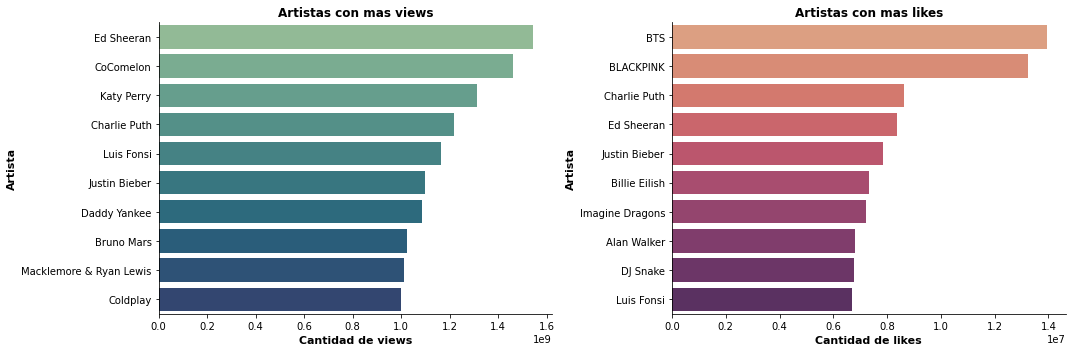

In [90]:
fig,ax = plt.subplots(1,2,figsize =(15,5))

sns.barplot(x='views',y='artist', data=mas_views,ax=ax[0],palette='crest')


ax[0].set_ylabel('Artista', fontweight = "bold", fontsize = 11)
ax[0].set_xlabel('Cantidad de views',fontweight = "bold", fontsize = 11)
ax[0].set_title('Artistas con mas views', fontweight = "bold", fontsize = 12)

sns.barplot(x='likes',y='artist',data=mas_likes,ax=ax[1],palette='flare')


ax[1].set_ylabel('Artista', fontweight = "bold", fontsize = 11)
ax[1].set_xlabel('Cantidad de likes', fontweight = "bold", fontsize = 11)
ax[1].set_title('Artistas con mas likes', fontweight = "bold", fontsize = 12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)        

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.savefig('../Gráficas/grafica1.jpg')

fig.tight_layout()
plt.show();


En las gráficas se puede observar un 1ex arriba del eje de Y y X, esto es que todos los valores mostrados en el eje Y y X estan multiplicados por 10ex. Es decir, está en notación científica.

Ninguno están en las mismas posiciones pero Charlie Puth, Ed Sheeran y Justin Bieber se encuentran en las dos gráficas, por lo que sí se podría decir que hay una cierta relación.

* BONUS Haced lo mismo para los datos de tipo "single".

In [91]:
mas_views_single = single.groupby('artist')[['views','likes']].mean().round(0).reset_index().sort_values(by='views',ascending=False).head(10)
mas_views_single

,artist,views,likes
221,Charlie Puth,2.935089e+09,20873474.0
1026,Rihanna,2.626030e+09,10603656.0
943,PSY,2.520605e+09,14396842.0
1246,Twenty One Pilots,1.987867e+09,15003359.0
1291,Wiz Khalifa,1.690387e+09,11947629.0
107,BLACKPINK,1.465903e+09,16591806.0
191,Calvin Harris,1.371673e+09,6025032.0
280,Daddy Yankee,1.317749e+09,6632210.0
238,Christina Perri,1.107727e+09,6929093.0
772,Macklemore & Ryan Lewis,1.012206e+09,6604141.0


In [92]:
mas_likes_single = single.groupby('artist')[['views','likes']].mean().round(0).reset_index().sort_values(by='likes',ascending=False).head(10)
mas_likes_single

,artist,views,likes
221,Charlie Puth,2.935089e+09,20873474.0
107,BLACKPINK,1.465903e+09,16591806.0
1246,Twenty One Pilots,1.987867e+09,15003359.0
943,PSY,2.520605e+09,14396842.0
228,Childish Gambino,8.673776e+08,12332273.0
1291,Wiz Khalifa,1.690387e+09,11947629.0
1343,j-hope,3.747844e+08,11774615.0
1026,Rihanna,2.626030e+09,10603656.0
109,BTS,2.306004e+08,7514177.0
120,Bastille,5.261557e+08,7028406.0


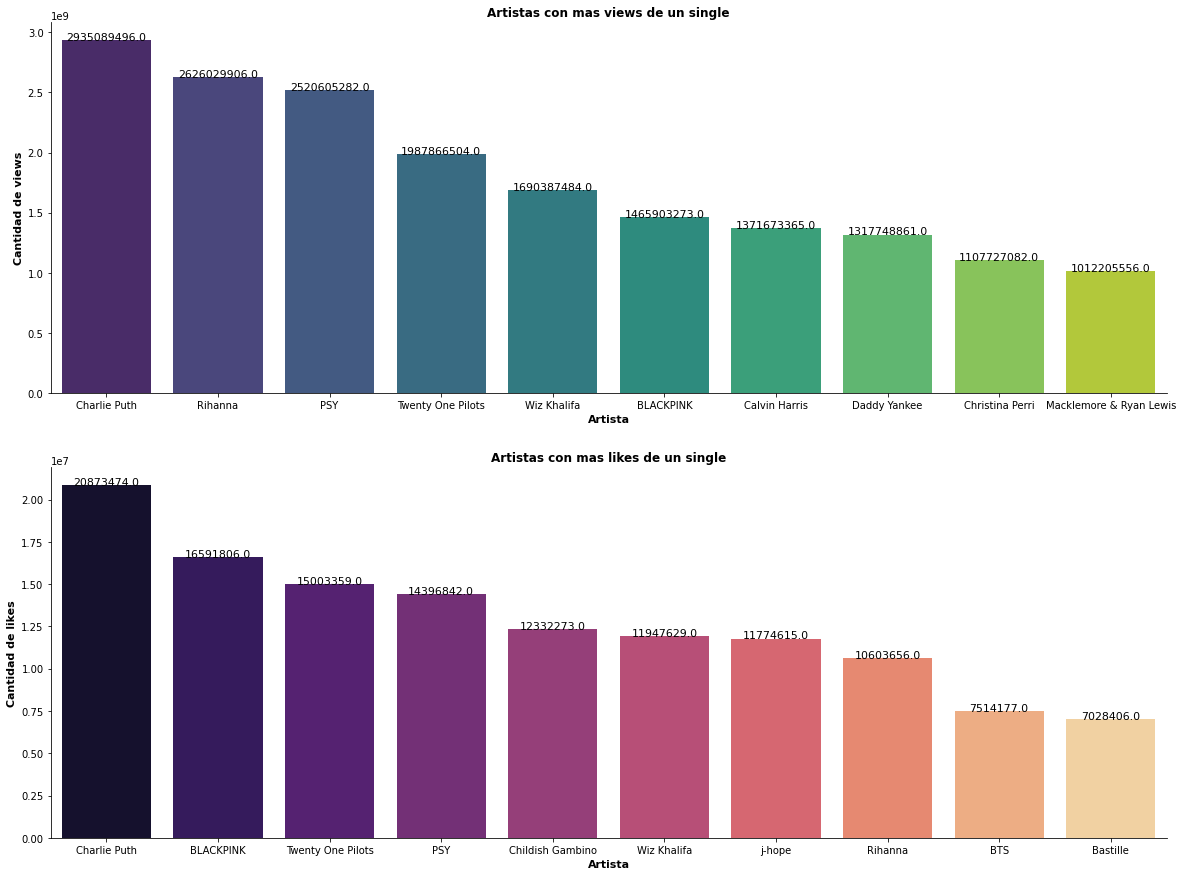

In [93]:
fig,ax = plt.subplots(2,1,figsize =(20,15))

sns.barplot(x='artist' , y='views', data=mas_views_single,ax=ax[0],palette='viridis')


ax[0].set_xlabel('Artista', fontweight = "bold", fontsize = 11)
ax[0].set_ylabel('Cantidad de views', fontweight = "bold", fontsize = 11)
ax[0].set_title('Artistas con mas views de un single', fontweight = "bold", fontsize = 12)


for indice, valor in enumerate(mas_views_single['views']):
    ax[0].text(indice,valor+0.1,str(valor),horizontalalignment = "center",fontsize = 11)


sns.barplot(x='artist' , y='likes', data=mas_likes_single,ax=ax[1],palette='magma')


ax[1].set_xlabel('Artista', fontweight = "bold", fontsize = 11)
ax[1].set_ylabel('Cantidad de likes', fontweight = "bold", fontsize = 11)
ax[1].set_title('Artistas con mas likes de un single', fontweight = "bold", fontsize = 12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)        

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


for indice, valor in enumerate(mas_likes_single['likes']):
    ax[1].text(indice,valor+0.1,str(valor),horizontalalignment = "center",fontsize = 11)
    
plt.savefig('../Gráficas/grafica2.jpg')
plt.show();

En las gráficas se puede observar un 1ex arriba del eje de Y, esto es que todos los valores mostrados en el eje Y estan multiplicados por 10ex. Es decir, está en notación científica.

Como vemos, el primer puesto lo ocupa Charlie Puth en los dos casos. Además BLACKPINK, Twenty One Pilots, PSY, Wiz Khalifa y Rihanna también sale en las dos gráficas pero en diferentes posiciones. Por lo que podemos decir que están bastante relacionadas. Es decir, si filtramos por tipo de album, la relación entre views y likes aumenta.

* Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:

* Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".

In [94]:
df_colaboraciones = df[df['track'].str.contains("feat", case=False)]
df_colaboraciones.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.04250,0.0469,0.116,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,gorillaz - new gold ft. tame impala & bootie b...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,new gold (feat. tame impala and bootie brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,-7.185,0.0629,0.01200,0.2620,0.325,0.358,127.030,274142.0,https://www.youtube.com/watch?v=BONNm0F7Tto,"gorillaz - new gold ft. tame impala, bootie br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),humanz (deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,-5.886,0.0313,0.00799,0.0810,0.112,0.462,140.158,209560.0,https://www.youtube.com/watch?v=f8NwLXYIHS4,gorillaz - she's my collar [hq],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),cracker island (feat. thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,-3.340,0.0465,0.00343,0.1030,0.325,0.643,120.012,213750.0,https://www.youtube.com/watch?v=S03T47hapAc,gorillaz - cracker island ft. thundercat (offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
27,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,Is This Love ('09) (feat. 50 Cent),curtain call 2,album,spotify:track:7rK0iM6jwuo1oizdx8suQA,0.853,0.776,8.0,-4.221,0.2610,0.07140,0.0000,0.181,0.659,94.028,212013.0,https://www.youtube.com/watch?v=Zl64MRAqQxk,"eminem, 50 cent - is this love ('09) [visualizer]",EminemVEVO,5289821.0,245935.0,9008.0,"Listen to ""Curtain Call 2"": \nhttps://Eminem.l...",True,True,28529840.0


* Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.

In [95]:
df_canciones_colab = df_colaboraciones.groupby('artist')['track'].count().reset_index().sort_values(by='track',ascending=False)
df_canciones_colab

,artist,track
404,Macklemore,10
307,Juicy J,10
62,Bibi und Tina,10
668,Wu-Tang Clan,9
138,DJ Khaled,9
...,...,...
331,Kesha,1
330,Kenny Loggins,1
327,Kendrick Lamar,1
325,Kelly Rowland,1


* Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.

In [96]:
mas_colab = df_canciones_colab.head(10)

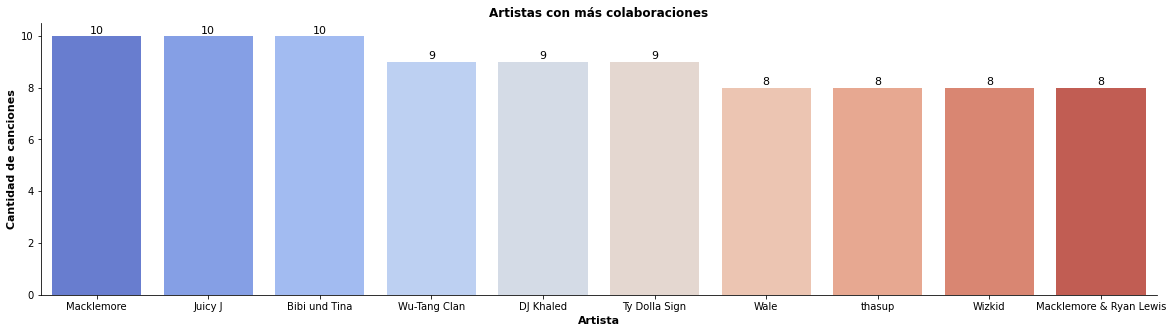

In [97]:
plt.figure(figsize =(20,5))

fig = sns.barplot(x='artist' , y='track', data=mas_colab,palette='coolwarm')

fig.set_xlabel('Artista', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Cantidad de canciones', fontweight = "bold", fontsize = 11)

fig.set_title('Artistas con más colaboraciones', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False) 

for indice, valor in enumerate(mas_colab['track']):
    plt.text(indice,valor+0.1,str(valor),horizontalalignment = "center",fontsize = 11);

plt.savefig('../Gráficas/grafica3.jpg')
plt.show();

* Deberéis contestar a las siguientes preguntas:
    * ¿Cuáles son los diez artistas que más han colaborado según los datos que tenemos?

Los 10 artistas que más han colaborado son: Bidi und Tina, Juicy J, Macklemore, Ty Dolla ign, DJ Khaled, Wu-Tang Clan, B o B, Macklemore & Ryan Lewis, Clean Bandit y Wizkid.

* ¿Cuál es el número de canciones en los que ha colaborado el artista que ocupa el primer lugar en el ranking?

10 canciones, y son tres artistas los que tienen este número de canciones: Bidi und Tina, Juicy J y Macklemore.

* ¿Cuál es el artista que ocupa el décimo lugar en el ranking y en cuántas canciones ha colaborado?

El artista es Wizkid que ha colaborado en 8 canciones, al igual de Wale, thasup y Macklemore and Ryan Lewis.

* Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:

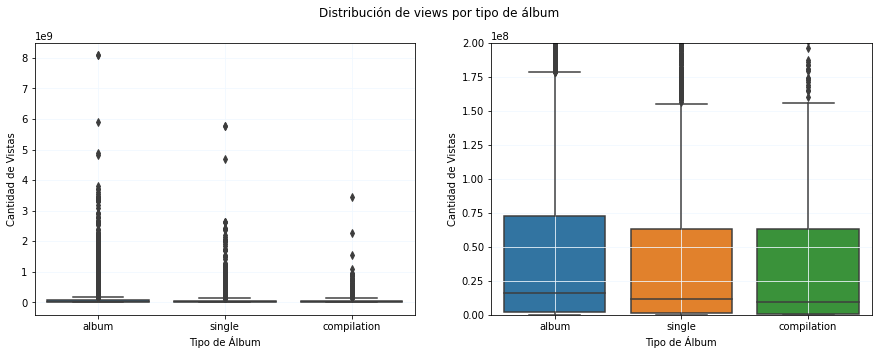

In [98]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

sns.boxplot(x='album_type', y='views', data=df, ax=ax[0])
sns.boxplot(x='album_type', y='views', data=df, ax=ax[1])

ax[0].set(xlabel='Tipo de Álbum',ylabel='Cantidad de Vistas')
ax[1].set(xlabel='Tipo de Álbum',ylabel='Cantidad de Vistas')

fig.suptitle('Distribución de views por tipo de álbum')

ax[0].grid(visible=True, color = "aliceblue")
ax[1].grid(visible=True, color = "aliceblue")

ax[1].set_ylim(0,200000000)

plt.savefig('../Gráficas/grafica4.jpg')
plt.show()

En las gráficas se puede observar un 1ex arriba del eje de Y, esto es que todos los valores mostrados en el eje Y estan multiplicados por 10ex. Es decir, está en notación científica.

Se ha tenido que acotar el eje de la Y porque no se podía apreciar bien los limites de la caja.

* ¿Qué tipo de álbumes tienden a tener más vistas en promedio?

Como vemos el tercer cuartil de las canciones de tipo album es más alto que en los otros dos. Eso significa que el 75% de los datos están por debajo de 75000000 visitas, mientras que los otros están por debajo de 65000000. Por otro lado, la mediana, en el caso de los de tipo album es superior que en el otros dos casos. Dados estos aspectos, podemos concluir que el tipo que tiene más visitas en promedio es el de album.

* ¿Existen valores atípicos (outliers) en alguna categoría de álbumes?

Como vemos en la primera gráfica, cada punto fuera de los bigotes de la caja son outliers, por lo tanto podemos concluir que en todas las categorías de álbumes hay muchos outliers.

* ¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

En general vemos una gran diferencia entre los de tipo álbum y los otros dos, ya que los de tipo single y compilation tienen valores muy similares, tanto de cuartiles como de mediana. Sin embargo, lo de tipo álbum destacan significativamente. Esto es posible debido a que un single es una canción momentanea que tiene menos posibilidades de hacerse viral o reconocida durante más tiempo.Sin embargo las de tipo albúm, al tener más canciones, pueden tener mas reproducciones al unir unas canciones con otras y así tener más reconocimiento y tener más visibilidad. Por último, las recopilaciones no son tan escuchadas porque, a pesar de contener las canciones más conocidas de un cantante, se suele acudir al álbum original para escuchar esas canciones.

## EXTRA

Creamos un dataframe con solo las columnas numéricas.

In [99]:
datos_numericos = df.select_dtypes(include='float')
datos_numericos.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08


Hacemos un coeficiente de Pearson para ver su relación.

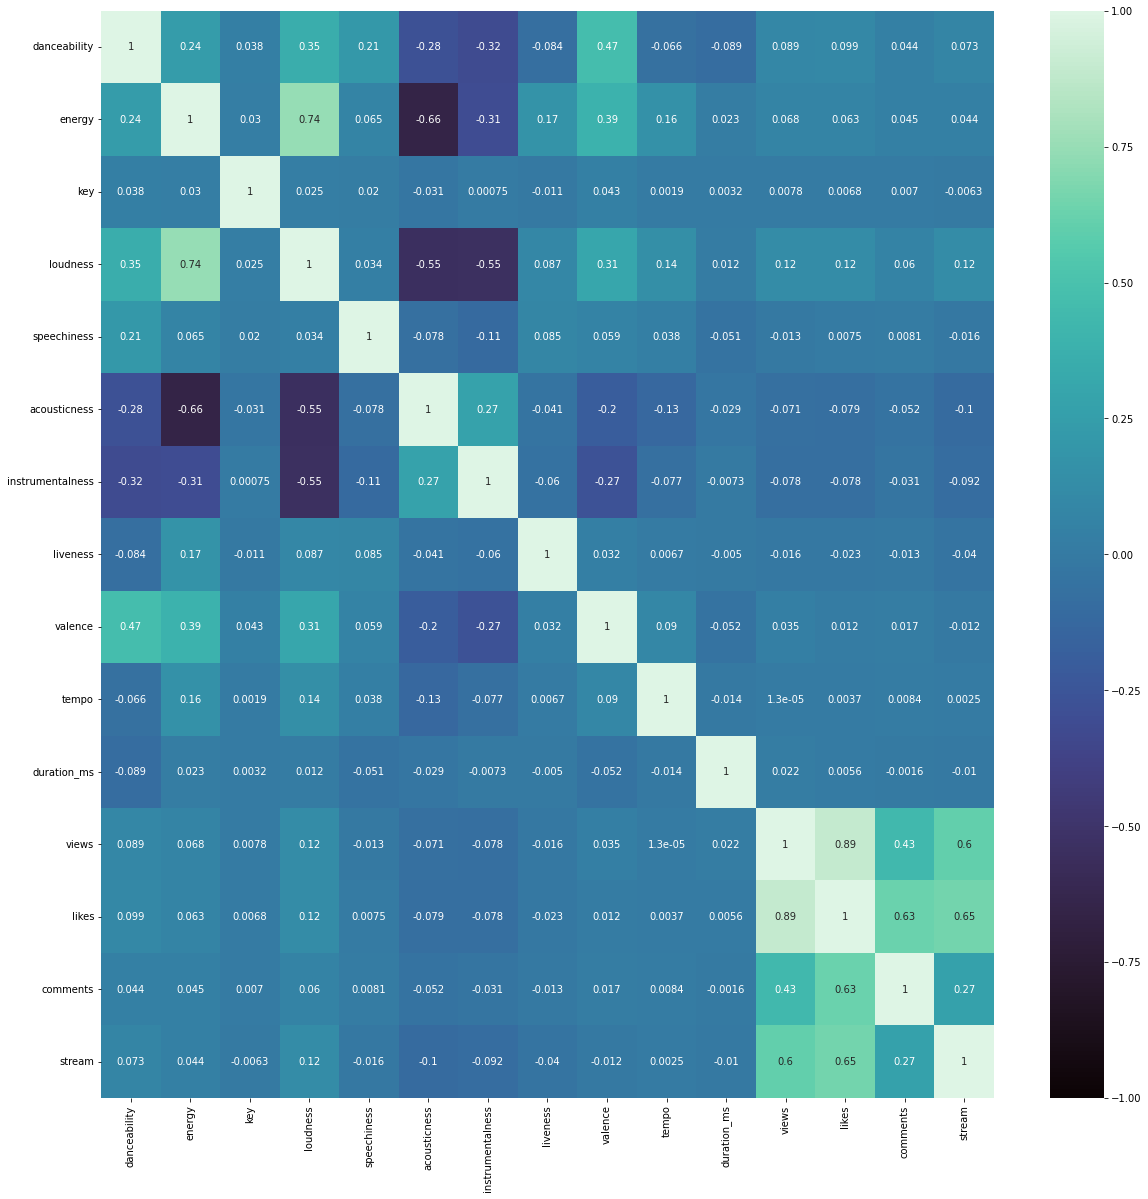

In [100]:
plt.figure(figsize = (20,20))

sns.heatmap(datos_numericos.corr(), cmap = "mako", annot = True, vmin = -1, vmax = 1)
plt.savefig('../Gráficas/grafica5.jpg')
plt.show();

Cogemos solo las columnas que tienen más relación entre ellas para que sea más facil su análisis.

In [101]:
df.columns

Index(['artist', 'url_spotify', 'track', 'album', 'album_type', 'uri',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'url_youtube', 'title', 'channel', 'views', 'likes',
       'comments', 'description', 'licensed', 'official_video', 'stream'],
      dtype='object')

In [102]:
columnas_sel = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence','views', 'likes','comments','stream',]

In [103]:
df_seleccion = df[columnas_sel]
df_seleccion

,danceability,energy,loudness,acousticness,instrumentalness,valence,views,likes,comments,stream
0,0.818,0.705,-6.679,0.008360,0.002330,0.7720,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,-5.815,0.086900,0.000687,0.8520,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,-3.930,0.042500,0.046900,0.5510,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,-5.810,0.000015,0.509000,0.5780,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,-8.627,0.025300,0.000000,0.5250,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,-6.344,0.448000,0.000000,0.6580,71678.0,1113.0,0.0,9.227144e+06
20714,0.531,0.936,-1.786,0.028000,0.000000,0.6570,164741.0,2019.0,0.0,1.089818e+07
20715,0.443,0.830,-4.679,0.024300,0.000000,0.4190,35646.0,329.0,0.0,6.226110e+06
20716,0.417,0.767,-4.004,0.356000,0.018400,0.5390,6533.0,88.0,0.0,6.873961e+06


Volvemos a hacer la correlacción.

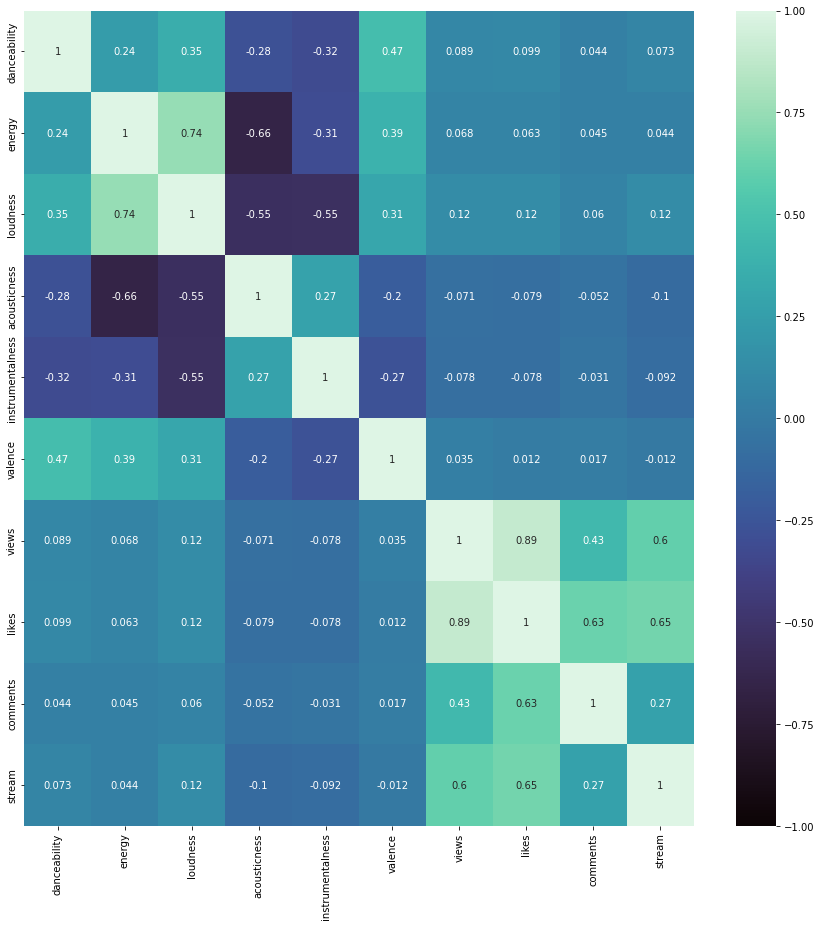

In [104]:
plt.figure(figsize = (15,15))

sns.heatmap(df_seleccion.corr(), cmap = "mako", annot = True, vmin = -1, vmax = 1)

plt.savefig('../Gráficas/grafica6.jpg')
plt.show();

Lo primero que llama la atención es la relación entre views y likes, tiene un valor positivo, lo cual tiene sentido ya que conforme más views o streams tenga, mas likes tendrá. Esto se puede relacionar con los comentarios, que también tiene un relación positiva con los tres anteriores. Pero tiene aún mas relación con likes que con views, es decir generalmente un video que tiene más likes suele tener más comentarios. Esto nos puede dar a entender que la persona que le da like también comenta.
- En relación con el ejercicio de quien tiene más likes y views, no salen exactamente los mismos porque no es una correlacción perfecta.

Otro aspecto a comentar es que no existe una relación real entre las views y el tipo de música, es decir, prácticamente todo tipo de música se escucha por igual, por lo tanto es muy heterogéneo.

Por otro lado, existe una alta relación positiva entre loudness y energy, es decir, cuando más ruidosa, más energía. Y también tiene la misma relación pero negativa con acoustiness, es decir, cuanto más acustica es la canción, menos energía tiene. Estas dos relaciones tienen mucho sentido.

Otro aspecto a destacar es la relación de acoustiness e instrumental, la cual es negativa. Es decir, cuando más acustica es la cancion, menos isntrumental tiene, lo cual sorprende ya que se suelen asociar.